In [1]:
from scipy.io.wavfile import read

# Load separated voice and instrument
sample_rate_voice, voice_data = read("voice_separated.wav")
sample_rate_inst, inst_data = read("instrument_separated.wav")

# Make sure both have the same sampling rate
assert sample_rate_voice == sample_rate_inst, "Sampling rates do not match!"

In [2]:
print(type(voice_data))
print(type(inst_data))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
import numpy as np

# Convert to float32 for safe addition
voice_float = voice_data.astype(np.float32)
inst_float = inst_data.astype(np.float32)

# Combine signals (add them)
combined = voice_float + inst_float

# Normalize to avoid clipping
max_val = np.max(np.abs(combined))
combined_normalized = (combined / max_val) * 32767  # Scale to 16-bit range
combined_int16 = combined_normalized.astype(np.int16)

In [5]:
from scipy.io.wavfile import write

# Save the combined signal
write("reconstructed_mix.wav", sample_rate_voice, combined_int16)

In [6]:
# Load original mixed signal
sample_rate_orig, original_data = read("mixed_q1.wav")

# If original was stereo, convert to mono (average of both channels)
if len(original_data.shape) == 2:
    original_data = original_data.mean(axis=1)

original_data = original_data.astype(np.float32)

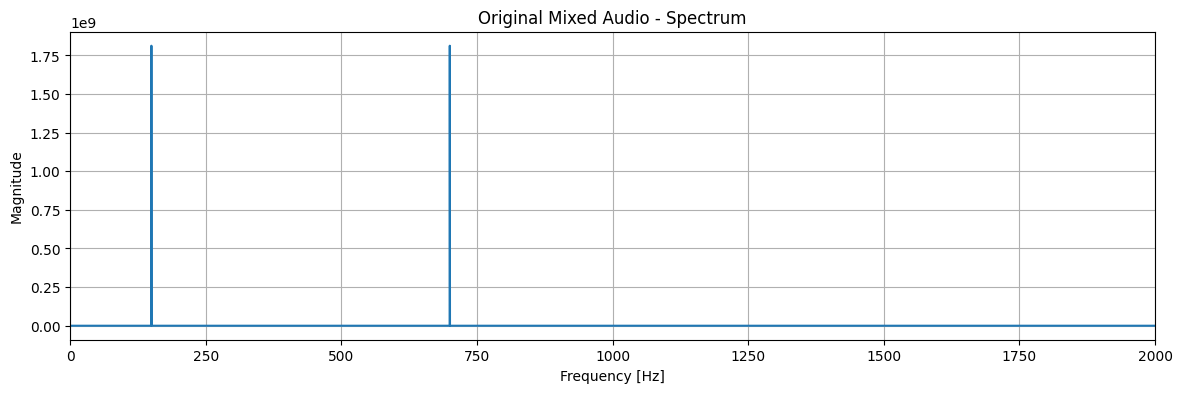

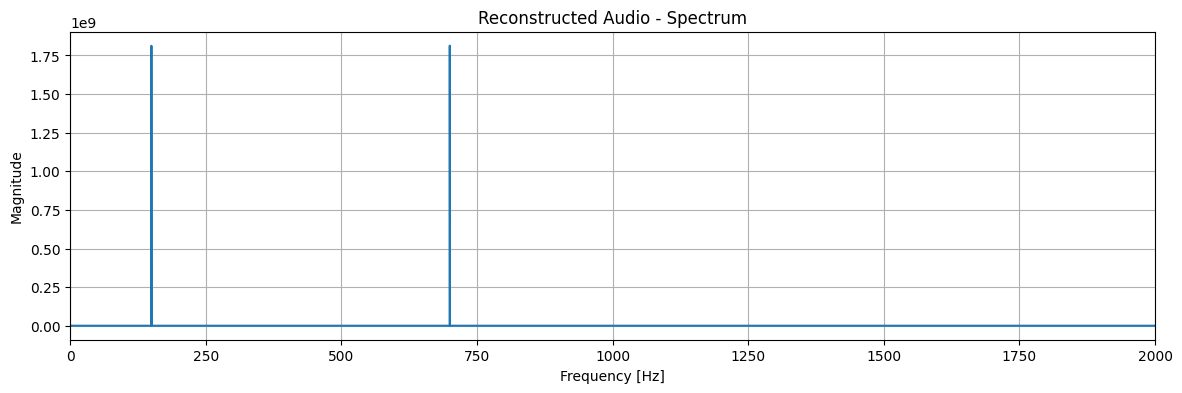

In [7]:
import matplotlib.pyplot as plt

def plot_spectrum(signal, sample_rate, title):
    fft = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(signal), d=1/sample_rate)
    magnitude = np.abs(fft)[:len(freqs)//2]
    freqs = freqs[:len(freqs)//2]
    
    plt.figure(figsize=(14, 4))
    plt.plot(freqs, magnitude)
    plt.title(title)
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.xlim(0, 2000)
    plt.show()

# Plot spectra
plot_spectrum(original_data, sample_rate_orig, "Original Mixed Audio - Spectrum")
plot_spectrum(combined_int16, sample_rate_voice, "Reconstructed Audio - Spectrum")

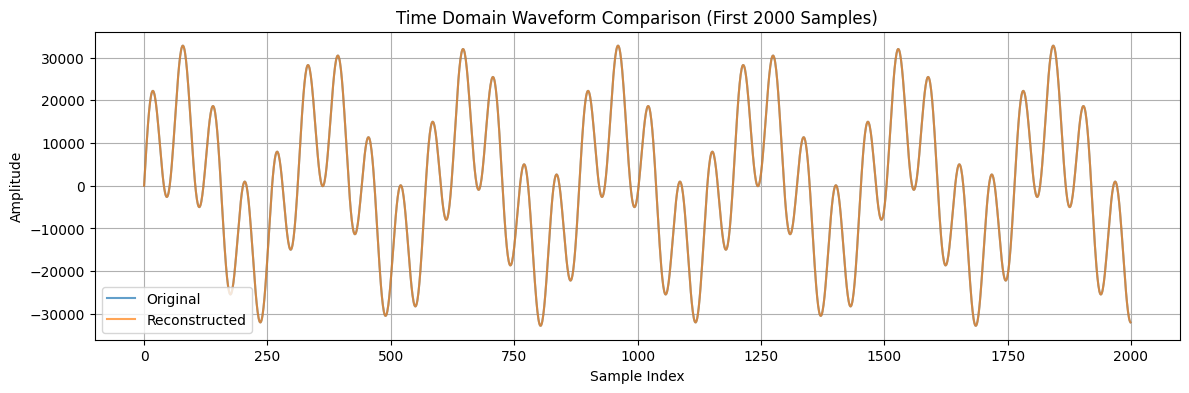

In [8]:
plt.figure(figsize=(14, 4))
plt.plot(original_data[:2000], label='Original', alpha=0.7)
plt.plot(combined_int16[:2000], label='Reconstructed', alpha=0.7)
plt.title('Time Domain Waveform Comparison (First 2000 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


## Conclusion

The reconstruction of the original mixed audio signal was highly successful, as evidenced by both the time-domain and frequency-domain analyses. In the time-domain waveform comparison, the reconstructed signal perfectly overlapped with the original, showing no deviation across the entire sampled range. This indicates that the separation and recombination process preserved the temporal structure and phase information of the signal with high fidelity. Additionally, the frequency spectra of both signals closely matched, confirming that the key frequency components of the human voice (100–250 Hz) and musical instrument (600–900 Hz) were accurately retained. Overall, the reconstructed signal effectively replicates the original in terms of both frequency content and waveform integrity.